<img src="https://miro.medium.com/max/1400/1*MauvaQb4aokes29WJ27OnQ.png" width="300" height="400">

# SQOOP: ingesta de datos (Puntuación: 50% de la PEC1, todos los ejercicios tienen el mismo valor)

Como ya se ha visto en la parte de teoría el sistema SQOOP es una herramienta fundamental del entorno Big Data de Apache Hadoop. Sqoop nos permite llevar datos de bases de datos relacionales a HDFS, lo que conocemos como ingesta de datos. La ingesta de datos es el primer paso de cualquier proyecto Big Data, ya que antes de empezar a ver cómo almacenar y procesar los datos en los entornos Big Data lo primero que tenemos que hacer es ingestar datos en ellos. En esta práctica exploraremos cómo podemos interactuar desde la linea de comandos con SQOOP. Hemos preparado una Base de datos relacional MySQL con varias tablas, en los siguientes ejercicios interactuaremos con la BBDD, haremos algunas consultas a los datos y por último ingestaremos unos datos en HDFS.

**Para ejecutar los ejercicios de SQOOP no podreis hacerlo desde el notebook, tendreis que hacerlo desde la terminal. Para abrir la terminal podeis hacerlo desde el icono del + arriba a la izquierda y despues en Others -> Terminal. Esta parte de la práctica la entregareis adjuntando capturas de pantalla de los comandos ejecutados y de el resultado de la ejecución en este mismo notebook**

En el siguiente enlace podeis encontrar toda la información sobre los comandos para importar datos con SQOOP: https://sqoop.apache.org/docs/1.4.6/SqoopUserGuide.html#_literal_sqoop_import_literal

Para el bloque de ejericicios de SQOOP necesitareis conocimientos básicos de SQL, existe numerosa documentación online sobre SQL, por ejemplo en este tutorial podreis encontrar todo lo necesario para hacer estos ejercicios: https://www.tutorialspoint.com/sql/index.htm

En primer lugar, una vez esteis en la consola, teneis que acceder a la base de datos MySQL utilizando vuestro usuario y contraseña con el siguiente comando (una vez introduzcais el comando os pedirá que escribais la password que os hemos facilitado):

In [ ]:
mysql -u <USER_NAME> -p

In [ ]:
mysql -u erocho -p

1. Utilizad la BBDD **DWH_RESERVAS** y listad las tablas que existen. La base de datos dispone de 1 tabla de hechos y 4 tablas de dimensiones, explorad las tablas y explicad como se relacionan entre ellas y qué información contienen.

In [ ]:
use DWH_RESERVAS;

In [ ]:
show tables;

In [ ]:
#Revisamos el siguiente código con cada tabla para conocer las columnas de cada tabla.

SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'd_pais';

**Explicad en este espacio que tablas componen la BBDD y cómo se relacionan entre ellas**

Las tablas son:

d_hotel
d_pais
d_regimen  
d_tipo_habitacion  
h_reserva

d_hotel contiene las columnas:
id_hotel
desc_hotel

d_pais contiene:
id_pais
desc_pais
codigo_alpha2

d_regimen contiene:
id_regimen
desc_regimen

d_tipo_habitacion contiene:
id_tipo_habitacion
desc_tipo_habitacion
capacidad_media
capacidad_maxima

h_reserva contiene:
id_reserva
id_hotel
id_tipo_habitacion
id_regimen
id_pais
desc_tipo_cliente
desc_canal
fecha_venta
fecha_entrada
fecha_salida
fecha_cancelacion
importe
habitaciones
adultos
menores
cunas

Por tanto vemos que cada tabla tiene su propia columna id, que es la primary key, que se relaciona con la tabla h_reserva que contiene columnas para los id's del resto de tablas, por lo que las tiene como claves foráneas. Por tanto, h_reserva es la tabla de hechos que relaciona al resto de tablas.

  2. Consultad la tabla **h_reserva** limitando el numero de filas a 10

**Realizad la query en la consola de Mysql y adjuntad una captura de pantalla en este espacio del notebook.**

select *
from h_reserva
limit 10;


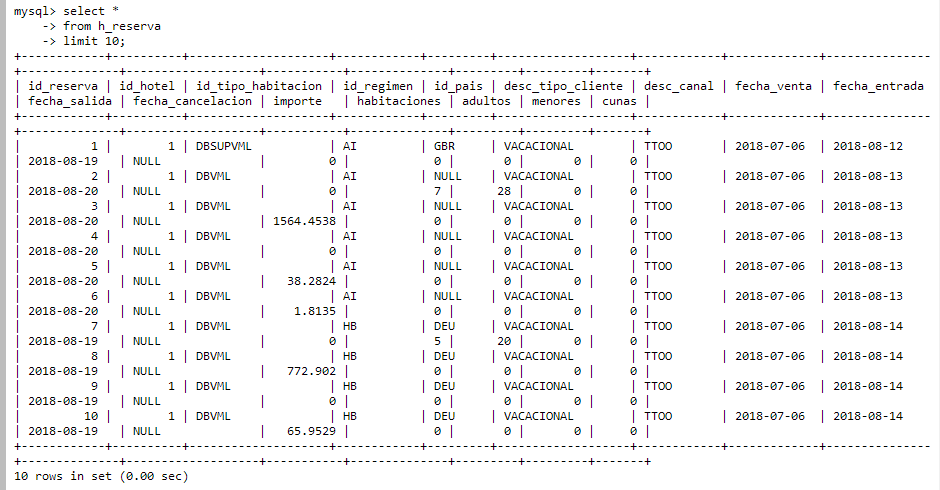

  3. Queremos saber la descripción del tipo de habitaciones más reservadas. Realizad una query que devuelva la descripción de las habitaciones y el numero de veces que ha sido alquilada una habitación de ese tipo.

**Realizad la query en la consola de Mysql y adjuntad una captura de pantalla en este espacio del notebook.**

SELECT d_tipo_habitacion.desc_tipo_habitacion, count(h_reserva.id_tipo_habitacion)
from d_tipo_habitacion

inner join h_reserva on 
d_tipo_habitacion.id_tipo_habitacion = h_reserva.id_tipo_habitacion

group by h_reserva.id_tipo_habitacion

order by count(h_reserva.id_tipo_habitacion) DESC;


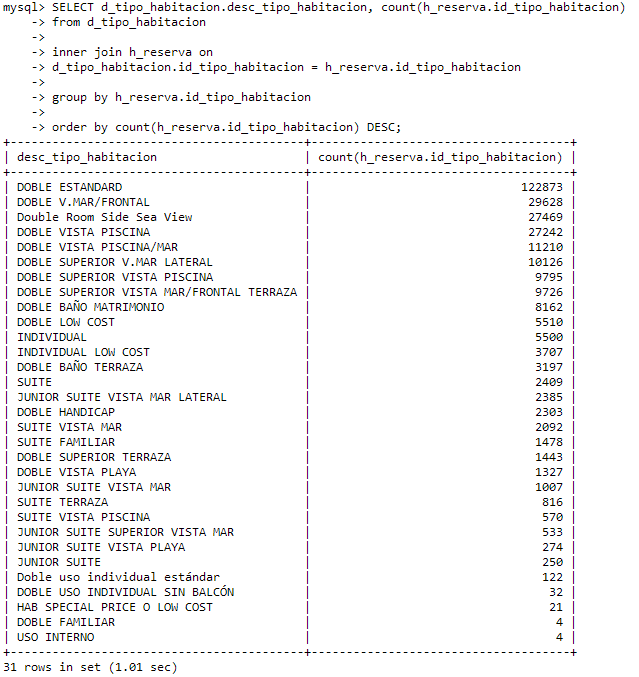

  4. Cread un proceso Sqoop que traspase la información de la tabla de MySQL **d_pais** a la ruta de HDFS /user/ vuestro_user_name /d_pais. Tendreis que completar el comando que se indica a continuación y lanzarlo desde la consola (abrid una nueva consola para tener una ejecución limpia).
  


In [ ]:
#Usamos este código para eliminar todo el contenido bajo la carpeta del user para evitar errores al realizar import que se podrían dar si ya existieran las carpetas:

hdfs dfs -rm -r /user/erocho/*

In [ ]:
sqoop import --connect jdbc:mysql://localhost/DWH_RESERVAS --table d_pais --username erocho --password jes4IJb6 --target-dir /user/erocho/d_pais --m 1

127.0.0.1

#revisamos que se hayan creado los ficheros dentro de la carpeta d_pais

hdfs dfs -ls /user/erocho/d_pais

**Realizad la ejecución en una terminal, copiad en la celda anterior el comando y adjuntad una captura de pantalla en este espacio del notebook.**

Estas son las últimas líneas del log, donde indica que la importación se ha realizado con éxito:

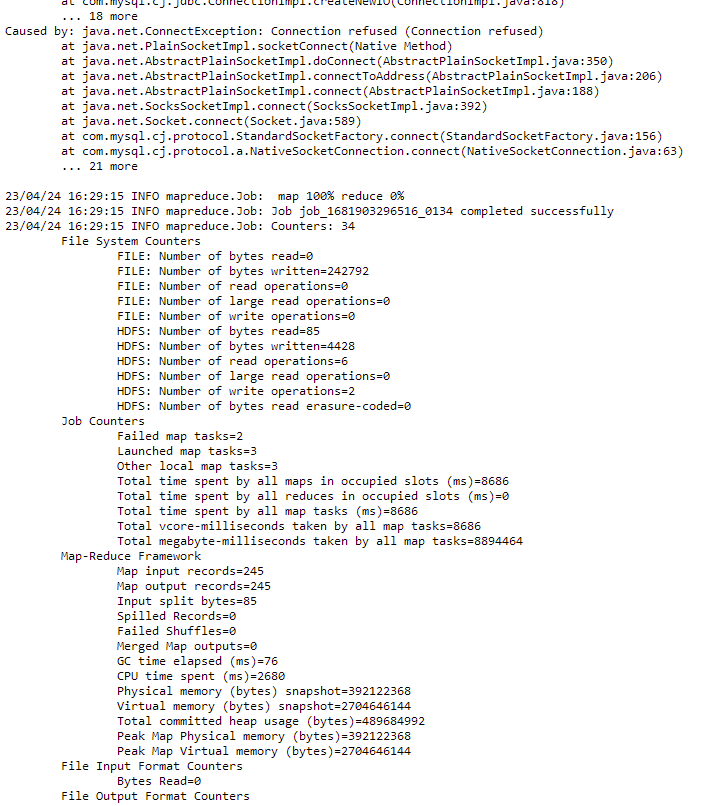

#Estos son los ficheros dentro de d_pais:
   
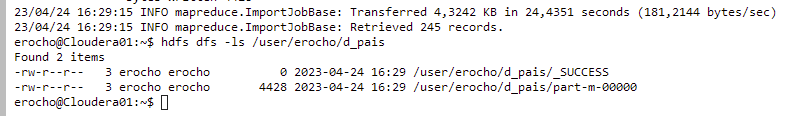

Con Sqoop podemos hacer ingestas totales de una tabla como la que acabamos de hacer en el ejercicio 4, o ingestas parciales, sólo algunos campos o sólo algunas filas utilizando la clausula WHERE.

   5. Cread un proceso Sqoop que traspase la información las columnas **id_tipo_habitacion** y **desc_tipo_habitacion** de la tabla de MySQL **d_tipo_habitacion** a la ruta de HDFS /user/ vuestro_user_name /d_tipo_habitacion.


In [ ]:
sqoop import --connect jdbc:mysql://localhost/DWH_RESERVAS --table d_tipo_habitacion --username erocho --password jes4IJb6 --columns "id_tipo_habitacion,desc_tipo_habitacion" --target-dir /user/erocho/d_tipo_habitacion --m 1

**Realizad la ejecución en una terminal, copiad en la celda anterior el comando y adjuntad una captura de pantalla en este espacio del notebook.**

Adjunto las últimas líneas del log, donde aparece la indicación de que se ha realizado la importación con éxtito:


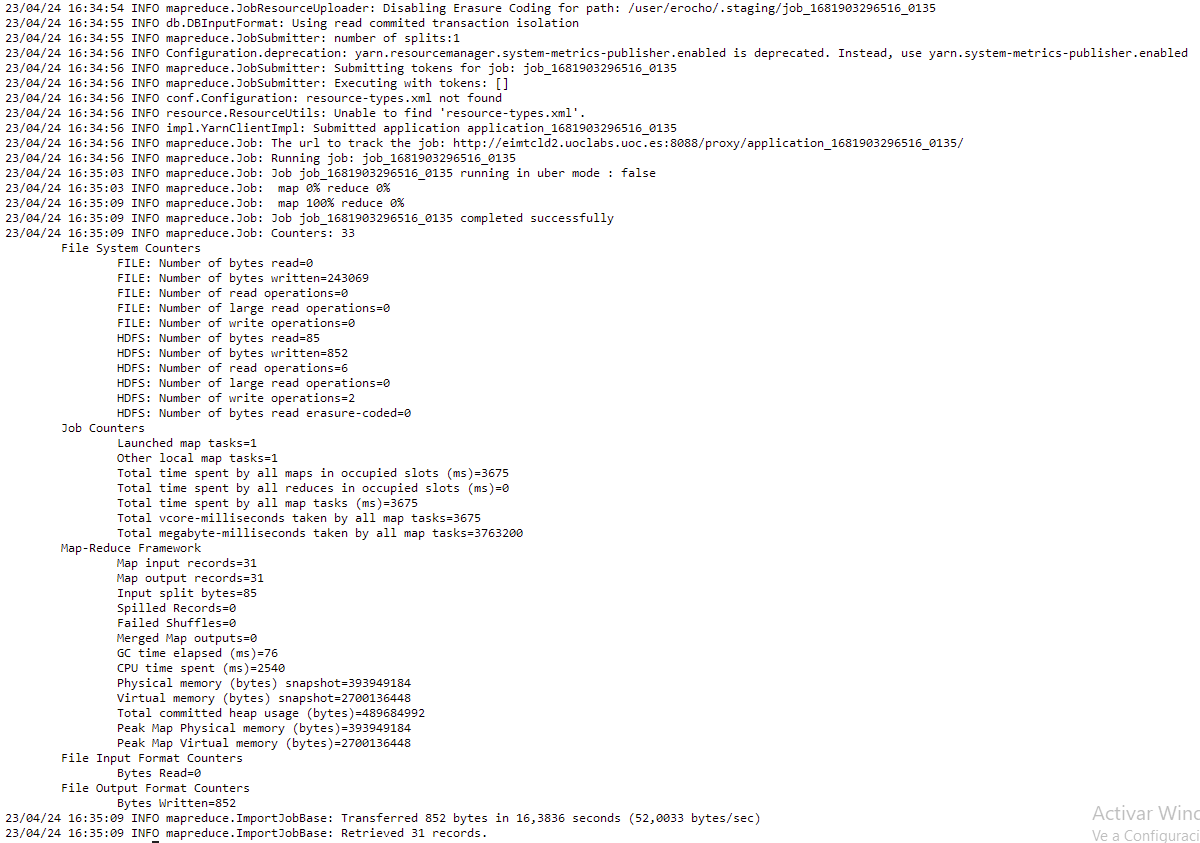

#Revisamos que los ficheros de d_tipo_habitacion estén incluidos en la carpeta:

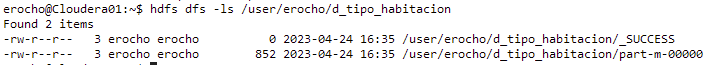

   6. Cread un proceso Sqoop que traspase la información de la tabla de MySQL **h_reserva** a la ruta de HDFS /user/ vuestro_user_name /h_reserva, pero sólo para los registros que cumplan **que el importe es mayor que 2000**.


In [ ]:
sqoop import --connect jdbc:mysql://localhost/DWH_RESERVAS --username erocho --password jes4IJb6 --query "select * from h_reserva where importe>2000 AND \$CONDITIONS" --target-dir /user/erocho/h_reserva --m 1

**Realizad la ejecución en una terminal, copiad en la celda anterior el comando y adjuntad una captura de pantalla en este espacio del notebook.**

Esta es la información del log relativa al código y al filtro aplicado:

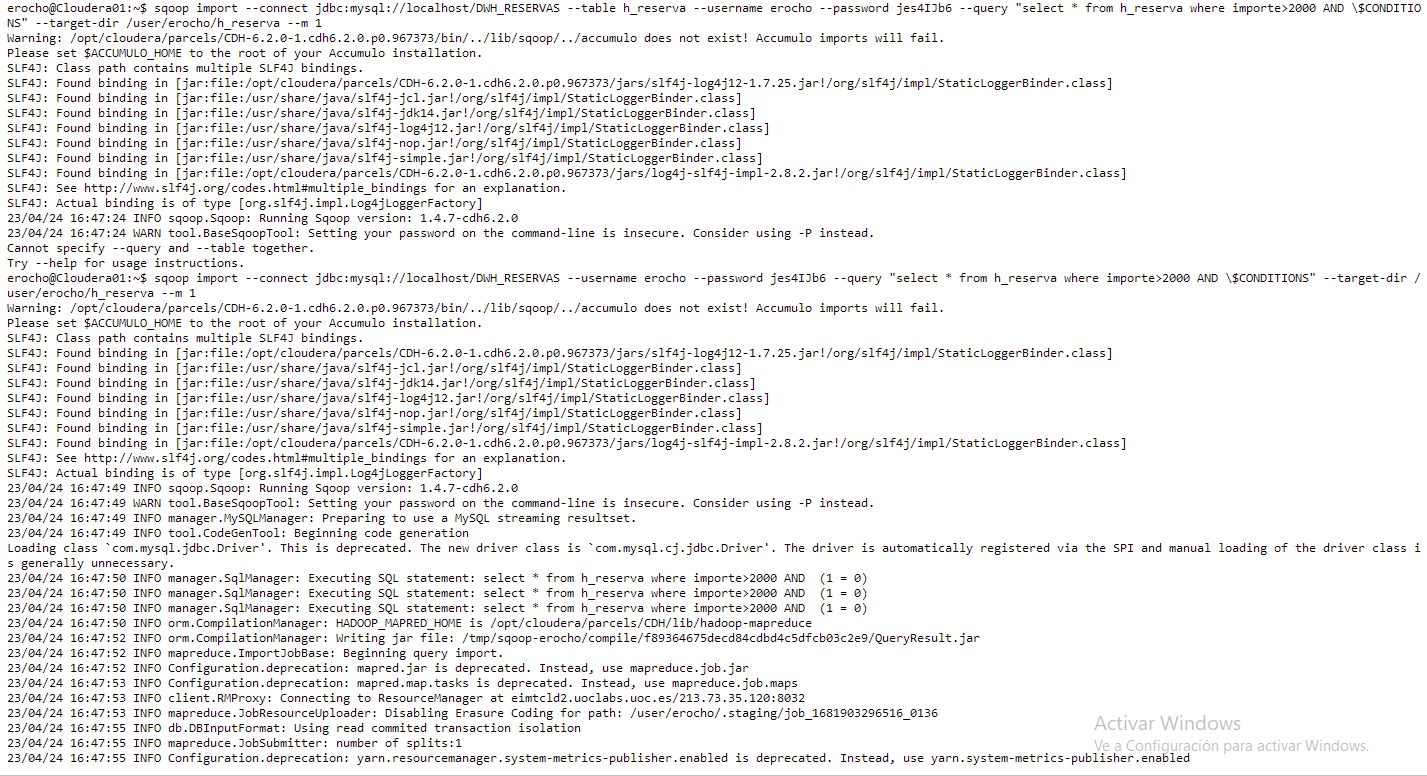

Y esta es la información del log con el Success de la importación:

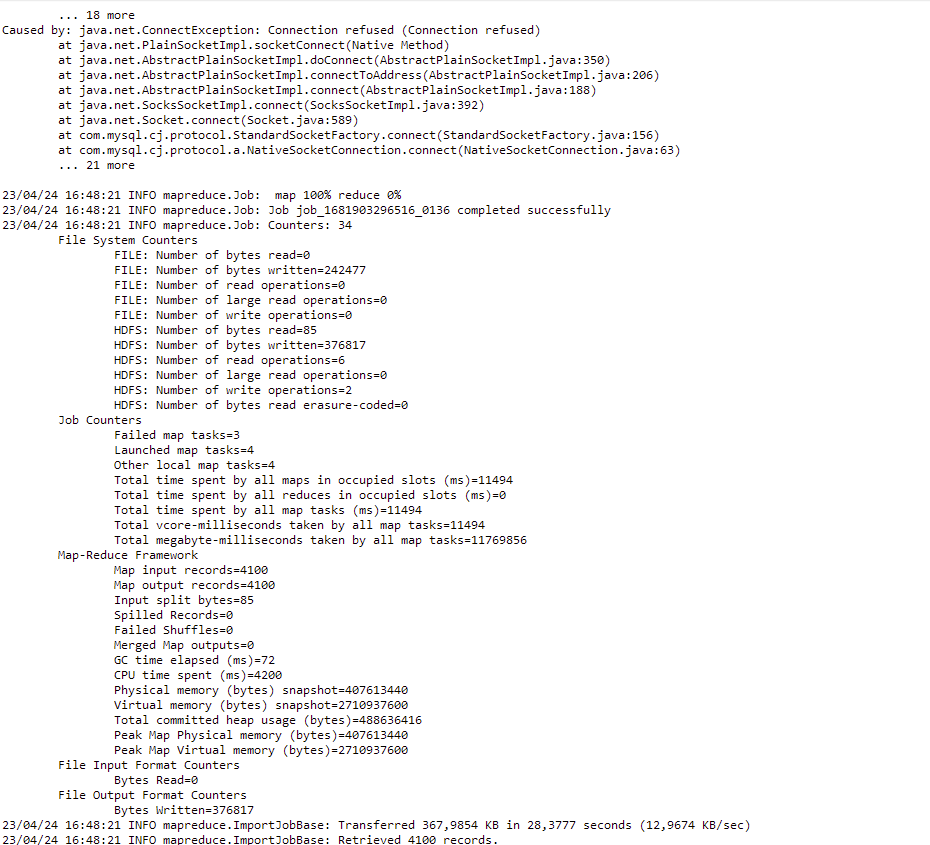

############################################################################### ###############################################################################
 
  
 
<img src="https://hadoop.apache.org/docs/r1.2.1/images/hadoop-logo.jpg">

# Sistema de ficheros HDFS: configuración del entorno de la asignatura (Puntuación: 50% de la PEC1, todos los ejercicios tienen el mismo valor)

Como ya se ha visto en la parte de teoría el sistema de archivos Hadoop (HDFS) es una parte fundamental del entorno Big Data de Apache Hadoop. En esta práctica exploraremos cómo podemos interactuar desde la linea de comandos con el sistema de ficheros HDFS. El primer paso es abrir un terminal desde el JupyterLab. Una vez confeccionada correctamente el pedido mediante la terminal se ruega que ésta sea ejecutada dentro del entorno JupyterLab como enseña a continuación.

Los comandos que se pueden enviar al sistema de archivos son muy similares a las de bash en entornos Linux. En la siguiente referencia oficial se pueden encontrar toda la información relativa a los comandos HDFS https://hadoop.apache.org/docs/current/hadoop-project-dist/hadoop-hdfs/HDFSCommands.html

Los comandos de HDFS que utilizaremos siempre van a empezar por `hdfs dfs` seguimos del comando o comandos que queramos ejecutar, por ejemplo, para listar los archivos del directorio raíz del HDFS utilizaremos el comando *ls*. 

`hdfs dfs -ls /`

In [ ]:
hdfs dfs -ls /

y para listar los ficheros del directorio /user: 

`hdfs dfs -ls /user`

In [ ]:
hdfs dfs -ls /user

Tal y como se verá a continuación los comandos que HDFS proporciona, permiten: listar, consultar, subir o bajar archivos desde el directorio local en HDFS. Como ya se ha podido ver el aula contiene una serie de directorios donde se proporcionarán y se dejarán los archivos necesarios para la realización de la asignatura. A continuación se pide ejecutar una serie de operaciones que dejarán su directorio hdfs personal configurado para la realización de la asignatura. Puede encontrar el manual de los comandos del sistema HDFS en la parte de "Contenidos y Recursos" de la asignatura.

En primer lugar vamos a empezar inspeccionando los ficheros que hemos ingestando con SQOOP en el ejercicio anterior



1. Listar la carpeta */user/\<loginestudiante\>/d_pais* el directorio HDFS. ¿Qué ficheros aparecen?

In [ ]:
hdfs dfs -ls /user/erocho/d_pais

Aparecen 2 ficheros, uno llamado "_SUCCESS" y otro llamado "part-m-00000"

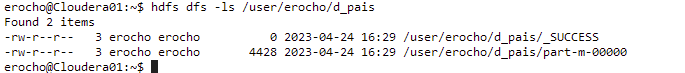

2. Inspeccionar el contenido del fichero */user/\<loginestudiante\>/d_pais/part-m-00000* de HDFS. Utilizad el comando `hdfs dfs -cat` ¿Qué información contiene?

In [ ]:
hdfs dfs -ls /user/erocho/d_pais/part-m-00000 

Contiene los datos que hemos importado desde país, es decir la información de las columnas id_pais, desc_pais, codigo_alpha2 ordenada alfabéticamente:
    
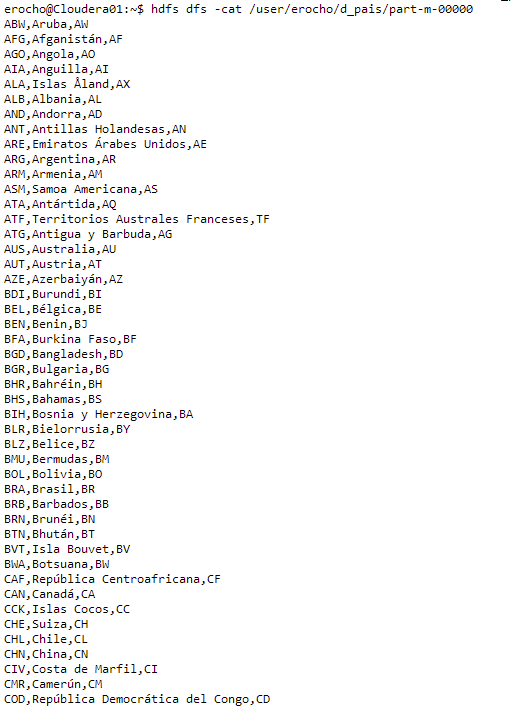

3. Crear la carpeta "data" dentro del directorio HDFS */user/\<loginestudiante\>/*

In [ ]:
hadoop fs -mkdir /user/erocho/data

Revisamos que se haya creado:
    
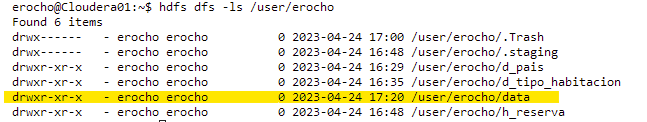

4. Copiar al directorio "data" que acabais de crear el fichero "/user/\<loginestudiante\>/d_pais/part-m-00000" que hemos inspeccionado anteriormente. Utilitzad el comando `hdfs dfs -cp` para copiar el fichero. 

In [ ]:
hdfs dfs -cp /user/erocho/d_pais/part-m-00000 /user/erocho/data

Revisamos que se haya añadido la información que teníamos en d_pais:
    
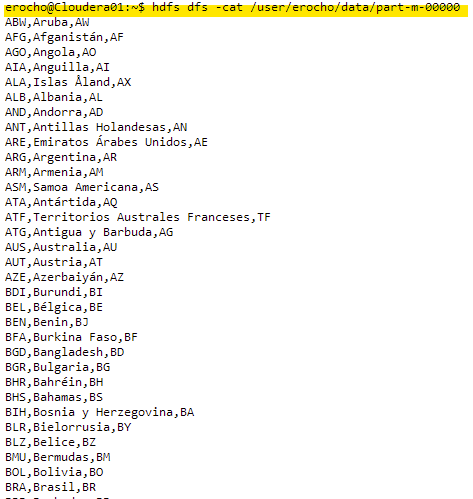

5. Copiar las 10 primeras lineas del fichero "LoremIpsum.txt" que se encuentra en el directorio HDFS */aula_M2.858/data/* a un nuevo fichero "LoremIpsum_10.txt" que creareis en el directorio HDFS */user/\<loginestudiante\>/data*. Os seran de utilidad los comandos `hdfs dfs -cat` i `hdfs dfs -put` a parte del comando classico de bash `head`. A continuación utilizad el comando `cat` para comprobar que se ha realizado la acción correctamente

In [ ]:
hdfs dfs -cat /aula_M2.858/data/LoremIpsum.txt | head -10 | hdfs dfs -put /user/erocho/data/LoremIpsum_10.txt

Aparece un error al realizar la copia: 
    
    
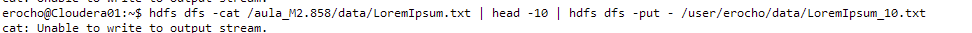


In [ ]:
hdfs dfs -cat HDFS/user/erocho/data/LoremIpsum_10.txt

Sin embargo al revisar con cat, la información está incluida y el fichero creado:
    
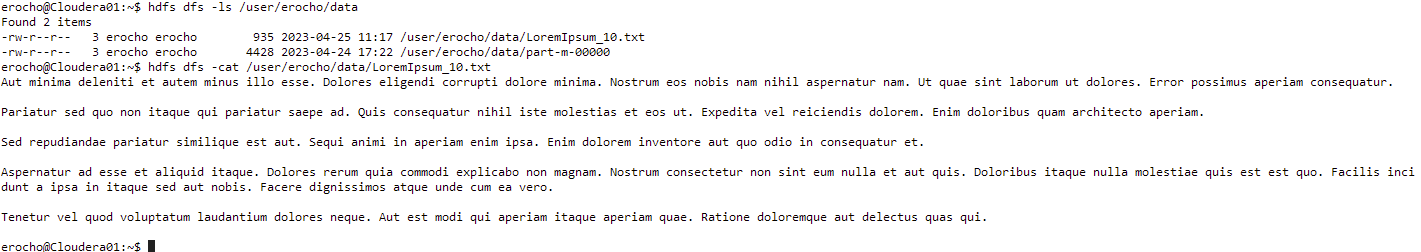

6. Descargar el fichero que acabais de crear */user/\<loginestudiante\>/data/LoremIpsum_10.txt* . Utilizar el comando `hdfs dfs -get`

In [ ]:
hdfs dfs -get /user/erocho/data/LoremIpsum_10.txt

Al ejecutar este código, se añade el fichero Loremipsum_10.txt al explorador de Jupyter, por lo que entendemos que el código ha funcionado:

   
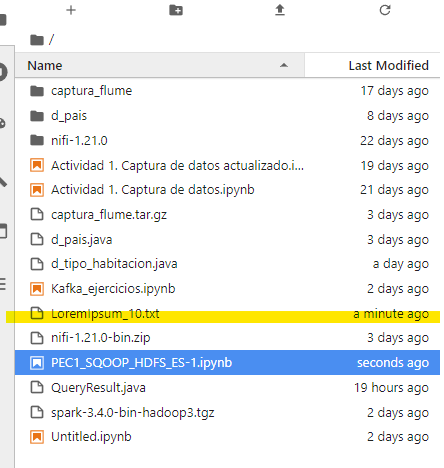

A parte de los comandos que ya habéis visto orientados a que cada usuario pueda gestionar el sistema de fitxeros HDFS, también es posible explorar la organización interna de los diferentes fitxeros existentes en los directorios HDFS.

7. Se pide que mediante el comando `hdfs fsck` se determine i describa como esta estructurado el fichero */user/\<loginestudiante\>/data/LoremIpsum_10.txt* dentro del sistema HDFS. En concreto se pide mostrar como está subdividido en bloques, en que nodo están los bloques y si estos estéan replicados. Podeis consultar està información en la web oficial de referéncia.

In [ ]:
hdfs fsck /user/erocho/data/LoremIpsum_10.txt -files -blocks  -locations -racks -replicaDetails -maintenance

Obtenemos la siguiente información:
    
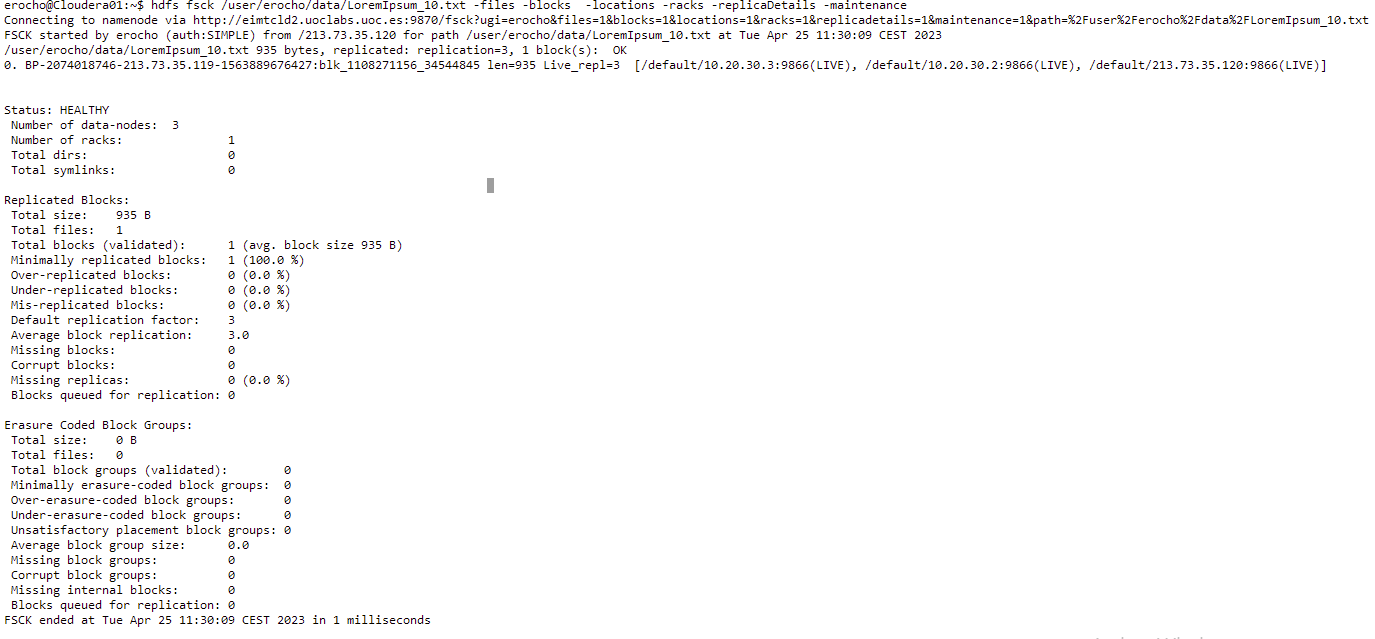

Vemos primero como hay una conexión al namenode, ya que es este el que dispone de toda la información relativa a los ficheros, 
y es con el que el cliente se comunica para obtener esa información.

En este caso se ha generado un solo bloque con un tamaño medio de 935 Bytes (que es el tamaño del fichero).

En cuanto a la replicación, vemos que es 3, lo que indica que el único bloque generado, se ha replicado y distribuido a 3 data-nodes,
como vemos en la información del Status.
Vemos igualmente que el factor de replicación por defecto es 3, por lo que este será el factor que se utilice a no ser que se cambie.

Hay también 1 solo rack para 3 data-nodes, lo que optimizaría las comunicaciones entre DataNodes, al estar en el mismo rack, haciendo 
que HDFS sea muy eficiente en el uso de la red interna del custer.

8. Como sabeis los diferentes ficheros HDFS están particionados en bloques. Podeis consultar la configuración mediante el comando: `hdfs getconf -confKey dfs.blocksize`. Quantos MB hay por bloque?

In [ ]:
hdfs getconf -confKey dfs.blocksize

Obtenemos 134217728: 



Si revisamos en https://hadoop.apache.org/docs/current/hadoop-project-dist/hadoop-hdfs/hdfs-default.xml

Encontramos que 134217728 bytes es el tamaño standard, que se corresponde con 128 MB.
Es decir, la configuración que tenemos por bloque es la que tiene HDFS por defecto. Como teníamos un fichero de 935 bytes, HDFS ha generado un solo bloque.

9. ¿Si un fichero tuviera un tamaño de 340MB y lo almacenaramos en nuestro sistema HDFS, cuantos bloques se habrían generado (sin contar réplicas) y de qué tamaño cada una?


Se generarían 2 bloques de 128 MB y un bloque adicional de 84 MB, ya que la configuración para bloques que tenemos es la que hay por defecto (128 MB):

340/128= 2,65625


10. ¿Qué es la tolerancia a fallos y cómo se consigue en HDFS?


La tolerancia a fallos es la capacidad del sistema para seguir funcionando si algún elemento del mismo deja de funcionar.
Por ejemplo si en un cluster falla un nodo, podremos seguir realizando operaciones si el resto de nodos asumen las funciones del nodo que ha dejado de funcionar.

En el caso de HDFS se utiliza un modelo de asignación de bloques replicados en diferentes nodos, y además puede distribuir la información en racks,
por lo que además de tener tolerancia a fallos, también proporciona gran eficienciaen el uso de la red interna del cluster.

Concretamente en HDFS, el namenode identifica a los datanodes según su rack id pudiendo de este modo optimizar la tolerancia a fallos y optimizar el tráfico entre racks.



11. Se pide explorar la estructura del sistema HDFS mediante su WebUI. Para ello primeramente debemos crear un túnel ssh que nos dé acceso al puerto 9870 (sobre el que está corriendo la Web UI de HDFS). A los alumnos que tengáis un sistema basado en Linux, podéis hacerlo de manera muy simple mediante el siguiente comando:

```python
ssh -p55000  -L 9870:eimtcld2.uoclabs.uoc.es:9870 <login>@eimtcld2.uoclabs.uoc.es
       
```
Una vez ejecutado el comando y logeado correctamente podéis acceder a la Web UI de HDFS en la dirección:

```Python
http://localhost:9870/dfshealth.html#tab-overview
```

> Nota: a los alumnos que solo dispongan de un sistema Windows, adjuntamos una pequeña descripción para crear el túnel ssh mediante la aplicación Putty.

Esta pregunta es de texto libre y se pide que se describa a continuación qué información podéis obtener explorando la Web UI, número de DataNodes, localización de estos y su estado, factores de replicación, errores si los hay, etc.

Puedo acceder al login mediante este código:
        
ssh -p55000  -L 9870:eimtcld2.uoclabs.uoc.es:9870 erocho@eimtcld2.uoclabs.uoc.es

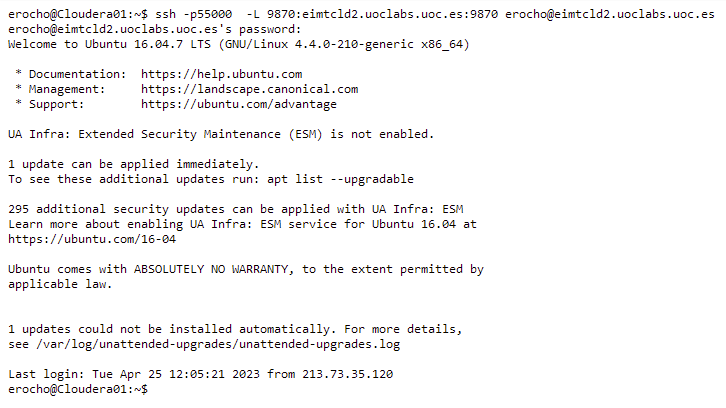

Sin embargo no puedo acceder al localhost:
    
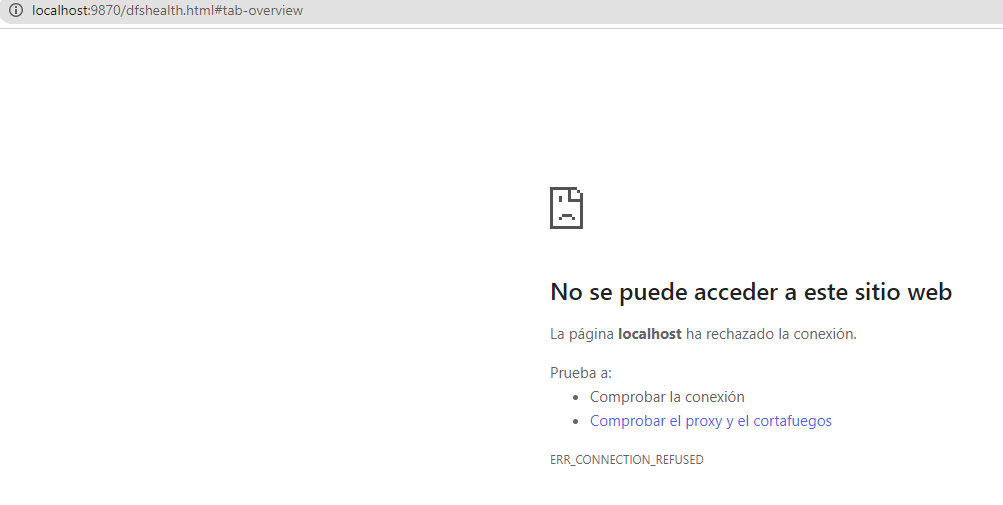

In [ ]:
Tampoco ha funcionado el acceso mediante Putty.